In [8]:
#Campeonato Quantamental
#Pegando dados P/L
import requests
import io
import json
import re
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
from datetime import *
from pandas.util.testing import assert_frame_equal

headers = {
    'authority': 'www.oceans14.com.br',
    'accept': 'application/json, text/javascript, */*; q=0.01',
    'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Mobile Safari/537.36',
    'x-requested-with': 'XMLHttpRequest',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    # coloque aqui a url de qualquer canto que seja do site oceans14
    'referer': 'https://www.oceans14.com.br/acoes/itau-unibanco/itub/balanco-dividendos',
    'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7,la;q=0.6',
    'cookie': 'ASP.NET_SessionId=jypd15qvl1yu3ypbgqzecxjj; uid=0EAB27F50DB06E1775959795C4949E2D; origem=https://l.facebook.com/; contadorViewsAcoes=3',
}

params = (
    ######IDENTIFICAR TICKER DA ACAO######
    ('papel', 'ITUB3'),
    ('periodo', '10a'),
)

response = requests.get('https://www.oceans14.com.br/rendaVariavel/respostaAjax/gHistoricoPl.aspx', headers=headers, params=params)
dframe = pd.json_normalize(response.json())
jason = response.text
normal = json.loads(jason)
datas = []
valores = []
for row in normal["rows"]:
    date = row['c'][0]['v']
    formatedDate = re.search(r"(?<=Date\()[^\):]+(?=:?\))", date).group(0)
    simpleData = formatedDate.replace(',', '-').replace(' ', '')
    separatedData = simpleData.split('-')
    correctDataList = ''
    for number in separatedData:
        if number != '0':
            correctDataList += ("%02d" % int(number)) + "-"
    correctDataList = correctDataList[:-1]
    datas.append(correctDataList)
    valores.append(row['c'][1]['v'])
frameDict = {
    "Date": datas,
    "valores": valores
}
dframe = pd.DataFrame(data=frameDict)
dframe['valores'] = dframe['valores'].values.tolist()
dframe['valores'] = valores

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  # This is added back by InteractiveShellApp.init_path()


In [9]:
#tickers = ['ITUB3.SA'] #IDENTIFICAR TICKER DA ACAO######
acao = 'ITUB3'
start_date = '2010-06-14'
end_date = '2020-06-08'
df = data.DataReader('ITUB3.SA', 'yahoo', start_date, end_date) #digitar ticker
df['Preco_Lucro'] = valores
tabela = df[['Close', 'Preco_Lucro']]

#tabela.set_index('Date',inplace=True)
tabela

ValueError: Length of values does not match length of index

In [ ]:
import talib
import matplotlib.pyplot as plt
import sys

upperband, middleband, lowerband = talib.BBANDS(tabela['Preco_Lucro'], timeperiod=200, nbdevup=3, nbdevdn=3, matype=0)
tabela['upperband'] = upperband
tabela['middleband'] = middleband
tabela['lowerband'] = lowerband
tabela

In [10]:
tabela = tabela.dropna()
#tabela.set_index('Date',inplace=True)
tabela

NameError: name 'tabela' is not defined

In [11]:
#Logico

def buy_sell(tabela): 
    compras = []
    vendas = []
    #tickers = 'AAPL' ######IDENTIFICAR TICKER DA ACAO######
    flag = 3
    #flag = 1 comprado
    #flag = 0 vendeu
    
    for i in range(len(tabela)):
        ###Testa se é para Comprar
        if tabela['Preco_Lucro'][i] < tabela['lowerband'][i]:   
          if flag != 1:
            compras.append(tabela['Close'][i])
            vendas.append(np.nan)
            flag = 1
          else:
            compras.append(np.nan)
            vendas.append(np.nan)
        ###Testa se é para Vender
        elif (tabela['Preco_Lucro'][i] > tabela['upperband'][i]):
          if ((flag != 0) & (flag != 3)):
            compras.append(np.nan)
            vendas.append(tabela['Close'][i])
            flag = 0
          else:
            compras.append(np.nan)
            vendas.append(np.nan)
        ###Caso nem compre nem vende
        else:
          compras.append(np.nan)
          vendas.append(np.nan)
        
    return (compras, vendas)



In [12]:
compras,vendas = buy_sell(tabela)
tabela['compra'] = compras
tabela['venda'] = vendas
tabela
#compras

NameError: name 'tabela' is not defined

In [13]:
#tickers = 'AAPL' ######IDENTIFICAR TICKER DA ACAO######
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(tabela['Close'], label = 'Preço',alpha = 1, linewidth=0.5, color='black')
plt.plot(tabela['Preco_Lucro'], label = 'Preço/Lucro', alpha = 1, linewidth=1.5)
plt.plot(tabela['middleband'], label = 'Media',alpha = 0.5, linewidth=0.5, color='green')
plt.plot(tabela['upperband'], label = 'Banda Superior',alpha = 0.5, linewidth=0.5, color='red')
plt.plot(tabela['lowerband'], label = 'Banda Inferior',alpha = 0.5, linewidth=0.5, color='red')
plt.scatter(tabela.index, tabela['compra'], label = 'Buy', marker='^',color = 'green', s=100)
plt.scatter(tabela.index, tabela['venda'], label = 'Sell',marker="v",color = 'red', s=100)
plt.xlabel('14/06/2010 à 09/06/2020', fontsize =15)
plt.title(acao, fontsize=20)
plt.legend(loc='best')

NameError: name 'tabela' is not defined

<Figure size 1080x576 with 0 Axes>

In [14]:
#tickers = 'AAPL' ######IDENTIFICAR TICKER DA ACAO######
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(tabela['Close'], label = 'Preço',alpha = 1, linewidth=0.5, color='black')
plt.plot(tabela['Preco_Lucro'], label = 'Preço/Lucro', alpha = 1, linewidth=1.5)
plt.plot(tabela['middleband'], label = 'Media',alpha = 0.5, linewidth=0.5, color='green')
plt.plot(tabela['upperband'], label = 'Banda Superior',alpha = 0.5, linewidth=0.5, color='red')
plt.plot(tabela['lowerband'], label = 'Banda Inferior',alpha = 0.5, linewidth=0.5, color='red')
plt.scatter(tabela.index, tabela['compra'], label = 'Buy', marker='^',color = 'green', s=100)
plt.scatter(tabela.index, tabela['venda'], label = 'Sell',marker="v",color = 'red', s=100)
plt.xlabel('14/06/2010 à 09/06/2020', fontsize =15)
plt.title(acao, fontsize=20)
plt.legend(loc='best')

NameError: name 'tabela' is not defined

<Figure size 1080x576 with 0 Axes>

In [111]:

def backtest_strategy(tabela, capital):#, symbol_benchmark): #volatility_threshold vai ajudar a definir o que é uma volatilidade baixa
    
                #pega na tabela price[simbolo] =0 e tbm coloca uma coluna cash
    df_init   = (tabela['Close']*0).to_frame().assign(cash = 0)#lida com a posicao no inicio do dia
    df_update = (tabela['Close']*0).to_frame().assign(cash = 0)#lida com as mudanças de posicao durante o dia
    df_end    = (tabela['Close']*0).to_frame().assign(cash = 0)#lida com a posicao no fim do dia
    
    df_init.iloc[0, df_init.columns.get_loc('cash')] = capital#colocando capital incial na primeira linha do data frameINICIAL
    df_end.iloc[0, df_end.columns.get_loc('cash')]   = capital#colocando capital incial na primeira linha do data frameFINAL dia
    
    calendar = pd.Series(tabela.index).iloc[1:]#pulando primeiro dia, que a gente nao faz trading e pegando todos od dias
    
    Numero_acoes_anterior=0
    Quantidade_em_caixa_anterior=capital
    for date in calendar:
        prev_date = df_init.index[df_init.index<date][-1]#p/ saber qual é o dia anterior
        
        df_init.loc[date, :] = df_end.loc[prev_date, :]#fazendo inicio dia ser igual ao final dia do DiaAnterior
        
        port_value = df_init.loc[date, 'Close'] * tabela.loc[date, 'Close'] + df_init.loc[date, 'cash']#valor do portifolio no inicio do dia= posiciao inicio dia*preço + valor em caixa
        
        #fazendo a trasicao entre caixa e comprado
        
        if tabela.loc[date, 'Preco_Lucro'] > tabela.loc[date, 'upperband']: # volatility is high -> be fully in cash
            df_end.loc[date, 'Close']=0
            Numero_acoes_anterior = 0
            df_end.loc[date, 'cash'] = port_value
            Quantidade_em_caixa_anterior = port_value
        elif (tabela.loc[date, 'Preco_Lucro'] < tabela.loc[date,'lowerband']): # volatility is low -> be in market position
            df_end.loc[date, 'Close'] = port_value/tabela.loc[date, 'Close']
            Numero_acoes_anterior = port_value/tabela.loc[date, 'Close']#divide pelo preco p colocar so a qtd alocada e n o valor
            df_end.loc[date, 'cash']=0
            Quantidade_em_caixa_anterior = 0
        else:
            df_end.loc[date, 'Close'] = Numero_acoes_anterior
            df_end.loc[date, 'cash'] = Quantidade_em_caixa_anterior
            
        df_update.loc[date] = df_end.loc[date] - df_init.loc[date]#passando a diferencao p o dfUpdate
    
    #comparação com benchmark
                      
    portval = (df_end * tabela.assign(cash = 1)[['Close', 'cash']]).sum(axis = 1).to_frame().rename(columns = {0:'strategy'})#trocando qdt alocada pelo valor alocado e juntando as duas colunas- para dar uma coluna com o valor final de cada dia (strategy) 
    #portval['benchmark'] = prices[symbol_benchmark]
    #portval = portval/portval.iloc[0].values #normalizando o valor inicial
    
    return (portval)
    

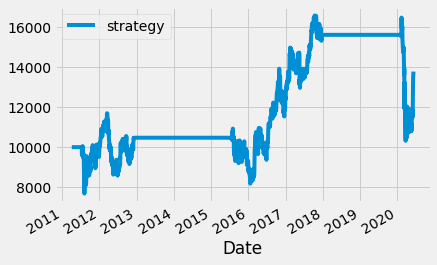

In [113]:
res = backtest_strategy(tabela = tabela, capital = 10000)
res.plot()
#df_init

In [19]:
#Calculo retorno da estrategia
#tabela['retorno']=tabela['Close'].pct_change()
#retorno = tabela['retorno'].sum()

def retorno(retorno):
    buy = []
    sell = []

    for i in range(df['compra'][i]):
        if tabela['compra'][i] >= 1: 
            buy.append(tabela['Close'][i])
        else:
            None
        if tabela['venda'][i] >= 1:   
            sell.append(tabela['Close'][i])
        else:
            None
            
    return (buy, sell)
